In [1]:
pip install yfinance PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return

In [3]:
import yfinance as yf

mpf1 = yf.Ticker("0P0000V1BK.HK")  
hist1 = mpf1.history(period="3y")
ChinaEquity = hist1.drop (columns=["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1)
ChinaEquity.rename(columns={'Close':'Principal China Equity Fund I'}, inplace=True)

mpf2 = yf.Ticker("0P0000VTVJ.HK")  
hist2 = mpf2.history(period="3y")
HSITracking = hist2.drop (columns=["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1)
HSITracking.rename(columns={'Close':'Principal Hang Seng Index Tracking Fund N'}, inplace=True)

mpf3 = yf.Ticker("0P0000V1BL.HK")  
hist3 = mpf3.history(period="3y")
HKEquity = hist3.drop (columns=["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1)
HKEquity.rename(columns={'Close':'Principal Hong Kong Equity Fund I'}, inplace=True)

mpf4 = yf.Ticker("0P0000V1BR.HK")
hist4 = mpf4.history(period="3y")
AsianEquity = hist4.drop (columns=["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1)
AsianEquity.rename(columns={'Close':'Principal Asian Equity Fund I'}, inplace=True)

mpf5 = yf.Ticker("0P0000V1C0.HK")  
hist5 = mpf5.history(period="3y")
USEquity = hist5.drop (columns=["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1)
USEquity.rename(columns={'Close':'Principal US Equity Fund I'}, inplace=True)

mpf6 = yf.Ticker("0P0000V1BW.HK")  
hist6 = mpf6.history(period="3y")
IntEquity = hist6.drop (columns=["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1)
IntEquity.rename(columns={'Close':'Principal International Equity Fund I'}, inplace=True)

mpf7 = yf.Ticker("0P0000V1BT.HK")
hist7= mpf7.history(period="3y")
GlobalGrowth = hist7.drop (columns=["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1)
GlobalGrowth.rename(columns={'Close':'Principal Global Growth Fund I'}, inplace=True)

mpf8 = yf.Ticker("0P0000V1BX.HK")  
hist8 = mpf8.history(period="3y")
LTAccum = hist8.drop (columns=["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1)
LTAccum.rename(columns={'Close':'Principal Long Term Accumulation Fund I'}, inplace=True)

mpf9 = yf.Ticker("0P0000V1BZ.HK")  
hist9 = mpf9.history(period="3y")
StableYield = hist9.drop (columns=["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1)
StableYield.rename(columns={'Close':'Principal Stable Yield Fund I'}, inplace=True)

mpf10 = yf.Ticker("0P0000V1BV.HK")  
hist10 = mpf10.history(period="3y")
IntBond = hist10.drop (columns=["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1)
IntBond.rename(columns={'Close':'Principal International Bond Fund I'}, inplace=True)

mpf11 = yf.Ticker("0P0000V1BY.HK")  
hist11 = mpf11.history(period="3y")
LTGuranteed = hist11.drop (columns=["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1)
LTGuranteed.rename(columns={'Close':'Principal Long Term Guaranteed Fund I'}, inplace=True)

mpf12 = yf.Ticker("0P0000VTVM.HK")  
hist12 = mpf12.history(period="3y")
HKBond = hist12.drop (columns=["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1)
HKBond.rename(columns={'Close':'Principal Hong Kong Bond Fund N'}, inplace=True)

mpf13 = yf.Ticker("0P0000V1BU.HK")  
hist13 = mpf13.history(period="3y")
HKDSavings = hist13.drop (columns=["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1)
HKDSavings.rename(columns={'Close':'Principal HK Dollar Savings Fund I'}, inplace=True)

mpf14 = yf.Ticker("0P00008SQR.HK")  
hist14 = mpf14.history(period="3y")
Conservative = hist14.drop (columns=["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1)
Conservative.rename(columns={'Close':'Principal MPF Conservative Fund N'}, inplace=True)

mpf15 = yf.Ticker("0P0000V1BS.HK")  
hist15 = mpf15.history(period="3y")
CapGuranteed = hist15.drop (columns=["Open","High","Low","Volume","Dividends","Stock Splits"],axis=1)
CapGuranteed.rename(columns={'Close':'Principal Capital Guaranteed Fund I'}, inplace=True)                        
                             
import pandas as pd
df = pd.concat([ChinaEquity, HSITracking, HKEquity, AsianEquity, USEquity, IntEquity, GlobalGrowth, LTAccum, StableYield,
IntBond,LTGuranteed,HKBond,HKDSavings,Conservative,CapGuranteed], join='inner', axis=1)
print(df)



            Principal China Equity Fund I  \
Date                                        
2018-02-09                         16.022   
2018-02-12                         16.064   
2018-02-13                         16.341   
2018-02-14                         16.677   
2018-02-15                         17.052   
...                                   ...   
2021-01-29                         20.751   
2021-02-01                         21.326   
2021-02-02                         21.834   
2021-02-03                         22.059   
2021-02-05                         21.778   

            Principal Hang Seng Index Tracking Fund N  \
Date                                                    
2018-02-09                                     15.728   
2018-02-12                                     15.727   
2018-02-13                                     15.963   
2018-02-14                                     16.279   
2018-02-15                                     16.567   
...            

In [4]:
## Summary

In [5]:
describe = df.describe()
describe = pd.DataFrame(describe)
describe = describe.T
describe

,count,mean,std,min,25%,50%,75%,max
Principal China Equity Fund I,713.0,15.746832,1.604468,12.401,14.601,15.432,16.801,22.533
Principal Hang Seng Index Tracking Fund N,713.0,15.036262,0.967180,12.215,14.324,15.045,15.764,17.148
Principal Hong Kong Equity Fund I,713.0,27.569572,2.330894,21.600,25.957,27.399,28.952,37.357
Principal Asian Equity Fund I,713.0,40.007842,4.315907,27.129,37.256,39.327,42.323,54.843
Principal US Equity Fund I,713.0,18.596302,1.463579,13.752,17.731,18.450,19.288,23.017
Principal International Equity Fund I,713.0,17.441832,1.444274,11.951,16.744,17.447,18.146,21.842
Principal Global Growth Fund I,713.0,24.144345,1.544596,19.309,23.250,24.028,24.906,29.587
Principal Long Term Accumulation Fund I,713.0,19.600285,1.039564,16.721,19.074,19.460,19.949,23.171
Principal Stable Yield Fund I,713.0,18.212212,0.765240,16.532,17.783,18.101,18.473,20.605
Principal International Bond Fund I,713.0,17.770163,0.705907,16.649,17.114,17.798,18.245,19.165


In [7]:
mu = mean_historical_return(df)
S = CovarianceShrinkage(df).ledoit_wolf()

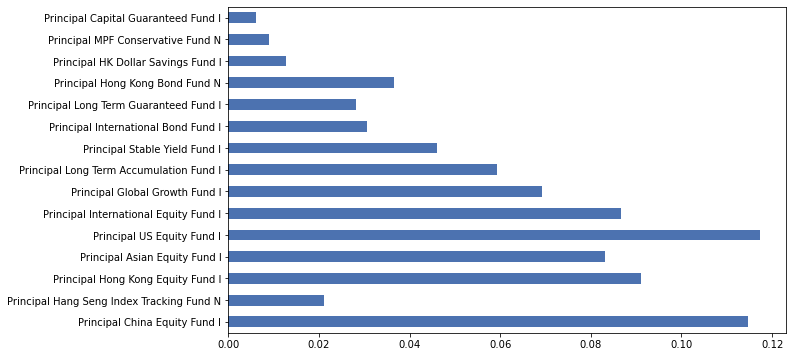

In [8]:
mu.plot.barh(figsize=(10,6))

In [9]:
## Function 1 - Portfolio Optimization for maximal Sharpe ratio

OrderedDict([('Principal China Equity Fund I', 0.05708), ('Principal Hang Seng Index Tracking Fund N', 0.0), ('Principal Hong Kong Equity Fund I', 0.0), ('Principal Asian Equity Fund I', 0.0), ('Principal US Equity Fund I', 0.06607), ('Principal International Equity Fund I', 0.0), ('Principal Global Growth Fund I', 0.0), ('Principal Long Term Accumulation Fund I', 0.0), ('Principal Stable Yield Fund I', 0.0), ('Principal International Bond Fund I', 0.0), ('Principal Long Term Guaranteed Fund I', 0.0), ('Principal Hong Kong Bond Fund N', 0.87685), ('Principal HK Dollar Savings Fund I', 0.0), ('Principal MPF Conservative Fund N', 0.0), ('Principal Capital Guaranteed Fund I', 0.0)])


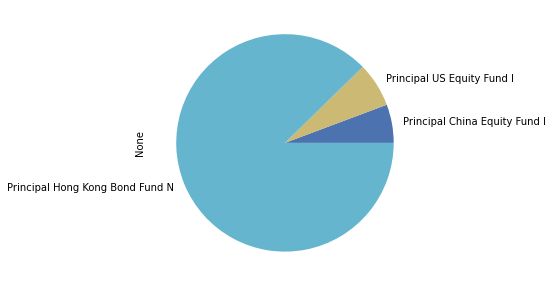

In [10]:
ef1 = EfficientFrontier(mu, S)

weight = ef1.max_sharpe() #raw weights
cleanweight1 = ef1.clean_weights() #cleaned weights
print(cleanweight1)
pd.Series(cleanweight1).plot.pie(figsize=(5,5))

In [22]:
print("Performance of portfolio:")
ret,vol,sharpe = ef1.portfolio_performance(verbose=True)

Performance of portfolio:
Expected annual return: 4.6%
Annual volatility: 3.1%
Sharpe Ratio: 0.84


In [23]:
## Function 2- Portfolio Optimization with given Risk Tolerance

OrderedDict([('Principal China Equity Fund I', 0.26428), ('Principal Hang Seng Index Tracking Fund N', 0.0), ('Principal Hong Kong Equity Fund I', 0.0), ('Principal Asian Equity Fund I', 0.0), ('Principal US Equity Fund I', 0.29844), ('Principal International Equity Fund I', 0.0), ('Principal Global Growth Fund I', 0.0), ('Principal Long Term Accumulation Fund I', 0.0), ('Principal Stable Yield Fund I', 0.0), ('Principal International Bond Fund I', 0.0), ('Principal Long Term Guaranteed Fund I', 0.0), ('Principal Hong Kong Bond Fund N', 0.43729), ('Principal HK Dollar Savings Fund I', 0.0), ('Principal MPF Conservative Fund N', 0.0), ('Principal Capital Guaranteed Fund I', 0.0)])


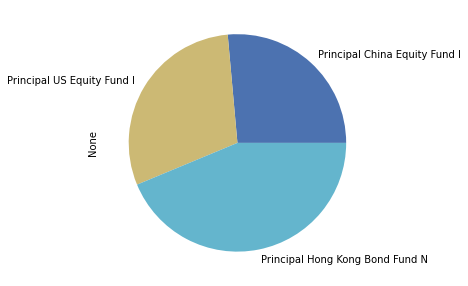

In [24]:
ef2 = EfficientFrontier(mu, S)

ef2.efficient_risk(target_volatility=0.1) #input desired volatility - default as ten percent
cleanweight2 = ef2.clean_weights()
print(cleanweight2)
pd.Series(cleanweight2).plot.pie(figsize=(5,5))

In [25]:
print("Performance of portfolio:")
ret,vol,sharpe = ef2.portfolio_performance(verbose=True)

Performance of portfolio:
Expected annual return: 8.1%
Annual volatility: 10.0%
Sharpe Ratio: 0.61


In [15]:
## Function 3 - Minimise risk for a given return

OrderedDict([('Principal China Equity Fund I', 0.37517), ('Principal Hang Seng Index Tracking Fund N', 0.0), ('Principal Hong Kong Equity Fund I', 0.0), ('Principal Asian Equity Fund I', 0.0), ('Principal US Equity Fund I', 0.4228), ('Principal International Equity Fund I', 0.0), ('Principal Global Growth Fund I', 0.0), ('Principal Long Term Accumulation Fund I', 0.0), ('Principal Stable Yield Fund I', 0.0), ('Principal International Bond Fund I', 0.0), ('Principal Long Term Guaranteed Fund I', 0.0), ('Principal Hong Kong Bond Fund N', 0.20203), ('Principal HK Dollar Savings Fund I', 0.0), ('Principal MPF Conservative Fund N', 0.0), ('Principal Capital Guaranteed Fund I', 0.0)])


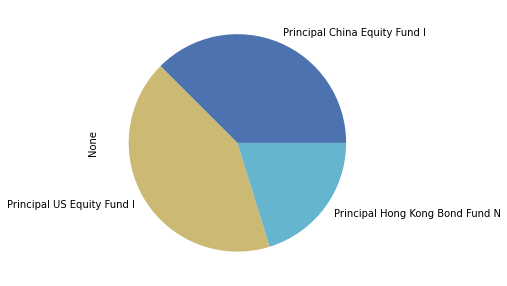

In [16]:
ef3 = EfficientFrontier(mu, S)
ef3.efficient_return(target_return=0.1) #input desired return - default as ten percent
cleanweight3 = ef3.clean_weights()
print(cleanweight3)
pd.Series(cleanweight3).plot.pie(figsize=(5,5))

In [17]:
print("Performance of portfolio:")
ret,vol,sharpe = ef3.portfolio_performance(verbose=True)

Performance of portfolio:
Expected annual return: 10.0%
Annual volatility: 14.2%
Sharpe Ratio: 0.56
